**PART A**

**DOMAIN:** Digital content and entertainment industry

**CONTEXT:** The objective of this project is to build a text classi ication model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classi ication algorithm to analyse the sentiment of the customers.

**DATA DESCRIPTION:** The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the irst 20 words from each review to speed up training, using a max vocabulary size of
10,000. As a convention, "0" does not stand for a speci ic word, but instead is used to encode any unknown word.

**PROJECT OBJECTIVE:** To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

import re
import os


In [2]:
#Import and analyse the data set
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words, maxlen=300)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(19051,)
(19450,)
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]


In [4]:
X_train_max_len = max(len(x) for x in x_train)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

X_test_max_len = max(len(x) for x in x_test)
print("Max length of sequence in X_test:  {}".format(X_test_max_len))

Max length of sequence in X_train: 299
Max length of sequence in X_test:  299


In [5]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 

In [6]:
data = np.concatenate((x_train, x_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [7]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [8]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 158.86618529388846
Standard Deviation: 61


In [9]:
print("Label:", label[0])

Label: 1


In [10]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
#Adding sequence to data
data = vectorize(data)
label = np.array(label).astype("float32")

In [13]:
label

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
sns.set(color_codes=True)
%matplotlib inline

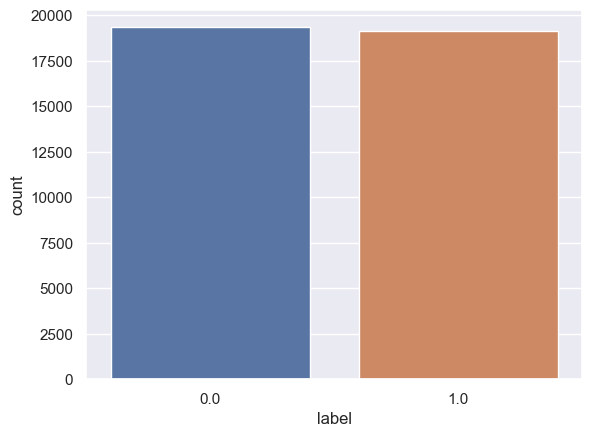

In [15]:
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.30, random_state=1)

In [17]:
X_train.shape

(26950, 10000)

In [18]:
X_test.shape

(11551, 10000)

In [19]:
from keras.utils import to_categorical
from keras import models
from keras import layers

In [20]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [21]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [22]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [23]:
results = model.fit(
 X_train, y_train,
 epochs= 100,
 batch_size = 40,
 validation_data = (X_test, y_test),
 callbacks=[callback]
)

Epoch 1/100
674/674 [==============================] - 6s 8ms/step - loss: 0.3436 - accuracy: 0.8483 - val_loss: 0.2672 - val_accuracy: 0.8902
Epoch 2/100
674/674 [==============================] - 5s 7ms/step - loss: 0.1957 - accuracy: 0.9232 - val_loss: 0.2852 - val_accuracy: 0.8875
Epoch 3/100
674/674 [==============================] - 5s 7ms/step - loss: 0.1256 - accuracy: 0.9541 - val_loss: 0.3631 - val_accuracy: 0.8798
Epoch 4/100
674/674 [==============================] - 5s 7ms/step - loss: 0.0852 - accuracy: 0.9688 - val_loss: 0.3920 - val_accuracy: 0.8765
Epoch 5/100
674/674 [==============================] - 5s 7ms/step - loss: 0.0645 - accuracy: 0.9765 - val_loss: 0.4666 - val_accuracy: 0.8830
Epoch 6/100
674/674 [==============================] - 5s 7ms/step - loss: 0.0509 - accuracy: 0.9810 - val_loss: 0.5315 - val_accuracy: 0.8819
Epoch 7/100
674/674 [==============================] - 5s 7ms/step - loss: 0.0451 - accuracy: 0.9824 - val_loss: 0.5380 - val_accuracy: 0.8777

In [28]:
print(np.mean(results.history["val_accuracy"]))

0.8805298166615623


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


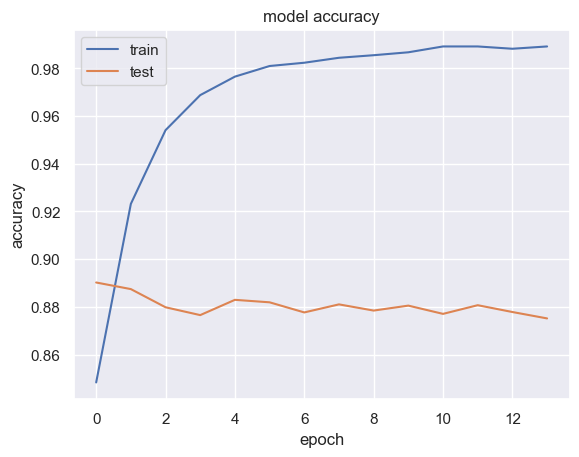

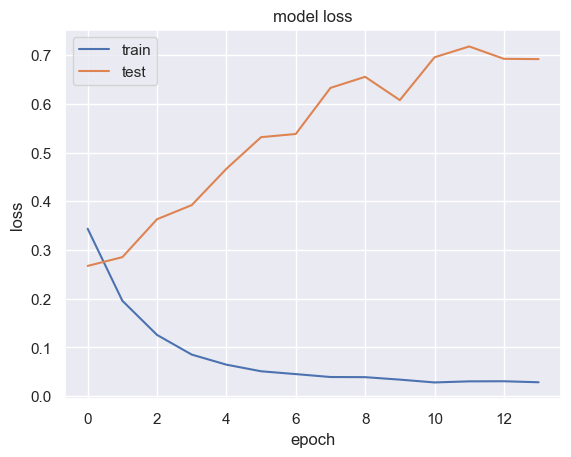

In [29]:
#Let's plot training history of our model
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model.predict(X_test)

361/361 [==============================] - 1s 1ms/step


array([[0.6072825 ],
       [1.        ],
       [0.45027578],
       ...,
       [0.99999845],
       [1.        ],
       [0.9999999 ]], dtype=float32)

Here is max 88% prediction 

<H2>PART B</H2>
<strong> DOMAIN:</strong> Social media analytics
<br/>
<strong> CONTEXT: </strong>
<p> Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based
supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to
other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project,
the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
 </p>

In [31]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing import text,sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout, GRU
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [32]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[n

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\farenrai\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data

True

<strong>Reading Sarcasm dataset json file</strong>

In [33]:
df2 = pd.read_json('data/Sarcasm_Headlines_Dataset_v2.json', lines=True)
df1= pd.read_json('data/Sarcasm_Headlines_Dataset.json', lines=True)

In [34]:
df2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [35]:
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [36]:
df3 = pd.concat([df2,df1], ignore_index=True)

In [37]:
df3.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55328 entries, 0 to 55327
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  55328 non-null  int64 
 1   headline      55328 non-null  object
 2   article_link  55328 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [39]:
df3.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [40]:
df3.is_sarcastic.unique()

array([1, 0], dtype=int64)

In [43]:
df3.shape

(55328, 3)

In [49]:
#Maping category 
df3['category'] = df3['is_sarcastic'].map( { 1:'Positive',0:'Negative'})
df3.head()

,is_sarcastic,headline,article_link,category
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,Positive
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,Negative
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,Negative
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,Positive
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,Positive


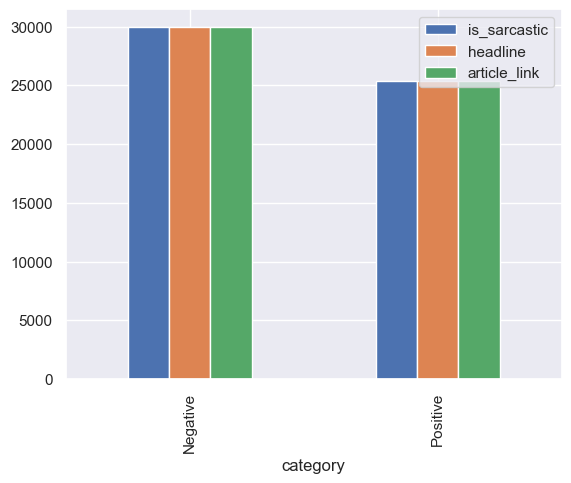

In [57]:
#distribution of sentiments
df3.groupby('category').count().plot(kind='bar')
plt.show()

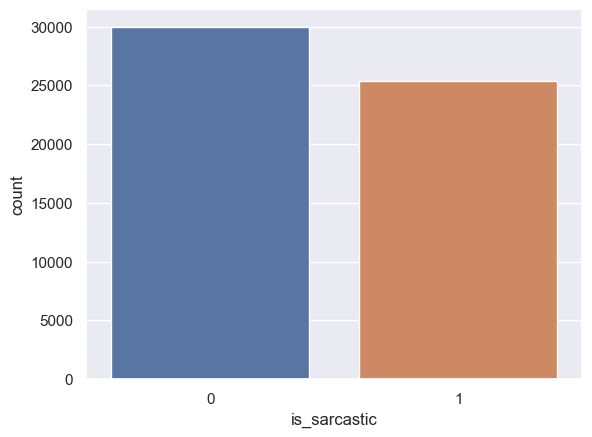

In [46]:
sns.countplot(x='is_sarcastic', data=df3)
plt.show()

**Preprocess the dataset**

**Preprocessing Function the textual column for cleaning**

In [58]:
stop_words = stopwords.words('english')
def textpreprocess(s):
    words = [] 
    s = s.strip().lower() 
    s = re.sub('\[.*?\]', '', s) 
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)
    
    words = s.split() # split the string into list of words
    words = [word for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string
    
    return s

In [59]:
X = []
sentences = list(df3['headline'])
for sen in sentences:
    X.append(textpreprocess(sen))

In [60]:
X

['thirtysomething scientists unveil doomsday clock hair loss',
 'dem rep totally nails congress falling short gender racial equality',
 'eat veggies deliciously different recipes',
 'inclement weather prevents liar getting work',
 'mother comes pretty close using word streaming correctly',
 'white inheritance',
 'ways file taxes less stress',
 'richard bransons globalwarming donation nearly much cost failed balloon trips',
 'shadow government getting large meet marriott conference room b',
 'lots parents know scenario',
 'lesbian considered father indiana amazing one',
 'amanda peet told daughter sex special hug',
 'know regarding current treatments ebola',
 'chris christie suggests hillary clinton blame boko harams kidnapping hundreds schoolgirls',
 'ford develops new suv runs purely gasoline',
 'uber ceo travis kalanick stepping trump economic advisory council',
 'area boy enters jumpingandtouchingtopsofdoorways phase',
 'area man traveling gurney',
 'leave person disabilities behind

In [61]:
X[10]

'lesbian considered father indiana amazing one'

In [62]:
y=df3['is_sarcastic']

In [63]:
y

0        1
1        0
2        0
3        1
4        1
        ..
55323    0
55324    0
55325    0
55326    0
55327    0
Name: is_sarcastic, Length: 55328, dtype: int64

<h2>Split data into train, test and validation sets</h2>

In [64]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

**Tokenization**

In [65]:
# hyperparameters
num_words_ = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [66]:
#converting text to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)

In [67]:
print(X_train)

[[1969, 1819, 1261, 330, 3098, 30, 4467, 241], [1855, 3, 3372, 1282, 593, 1455, 1532, 1, 442, 2736], [2620, 1820, 417, 1018, 1, 2406, 162, 552], [53, 1, 500, 56, 4, 1456, 743, 38], [980, 3, 851, 981, 2223, 1, 1, 1, 54, 1019, 719], [1457, 3976, 1, 2, 1], [1, 1283, 1], [1, 1, 1970, 1971, 1, 4754], [210, 1, 638, 3373, 2621, 284, 37, 2088, 2500, 1], [2309, 9, 17, 436, 1, 120, 2501], [4468, 1458, 1, 1, 1, 1], [1, 3977, 1423, 1, 1020, 16, 1, 2224], [2407, 3226, 1, 1, 3754, 3978, 453, 91], [108, 563, 90, 2310, 1757, 954, 1, 1, 17, 437, 690], [2, 215, 234, 1533, 122, 618, 1, 1042, 215, 196], [1, 1, 762, 524, 2737, 1], [1, 1, 814, 4755, 28, 676, 1, 2502], [8, 4, 2503, 152, 1348, 256, 2856, 396, 1308], [705, 1856, 11, 9, 3, 3539, 16, 2089], [143, 207, 304, 876, 4209, 318], [4210, 1758, 2857, 1, 1, 481, 1043], [278, 2225, 57, 46, 124, 1], [3, 1137, 594, 99, 690, 1424], [2226, 1, 720, 1, 1, 1759, 438], [2311, 2504, 11, 23, 545, 1760, 100, 37, 18, 162], [17, 3755, 454, 28, 4469, 2738, 1170], [25, 2

In [68]:
#Padding sequences for equal length

vocab_size = len(tokenizer.word_index)
maxlen = 150
trunc_type='post'
padding_type='post'

X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_val = pad_sequences(X_val, maxlen=maxlen , padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')

**LSTM Model Archetecture**

In [69]:
model2= Sequential()
embedding_layer = Embedding(vocab_size, 50, input_length=maxlen , trainable=True)
model2.add(embedding_layer)
model2.add(LSTM(64,return_sequences=True))
model2.add(LSTM(64,return_sequences=True))
model2.add(Dense(1, activation='sigmoid'))

In [70]:
model2.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           1396050   
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           33024     
                                                                 
 dense_4 (Dense)             (None, 150, 1)            65        
                                                                 
Total params: 1,458,579
Trainable params: 1,458,579
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/5
346/346 [==============================] - 86s 241ms/step - loss: 0.5959 - accuracy: 0.6774 - val_loss: 0.5018 - val_accuracy: 0.7455
Epoch 2/5
346/346 [==============================] - 76s 221ms/step - loss: 0.4082 - accuracy: 0.8269 - val_loss: 0.4067 - val_accuracy: 0.8240
Epoch 3/5
346/346 [==============================] - 78s 227ms/step - loss: 0.3483 - accuracy: 0.8543 - val_loss: 0.3760 - val_accuracy: 0.8384
Epoch 4/5
346/346 [==============================] - 81s 234ms/step - loss: 0.3040 - accuracy: 0.8725 - val_loss: 0.3653 - val_accuracy: 0.8449
Epoch 5/5
346/346 [==============================] - 82s 238ms/step - loss: 0.2849 - accuracy: 0.8781 - val_loss: 0.3486 - val_accuracy: 0.8484


In [72]:
from sklearn.metrics import roc_auc_score, accuracy_score
output_test = model2.predict(X_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

346/346 [==============================] - 10s 28ms/step
test auc: 0.8111927211936185


**Check Loss and accuracy of Train and validation sets**

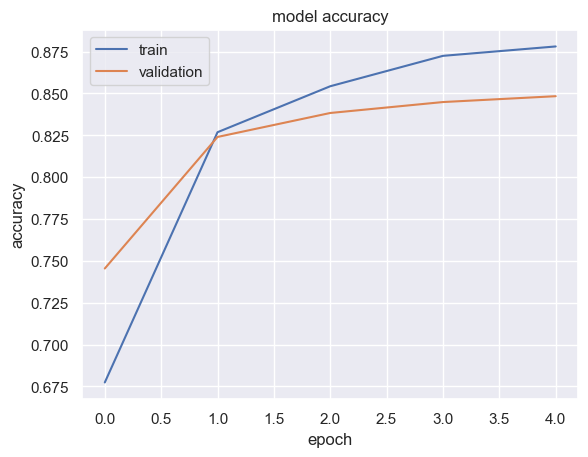

In [73]:
plt.subplots()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

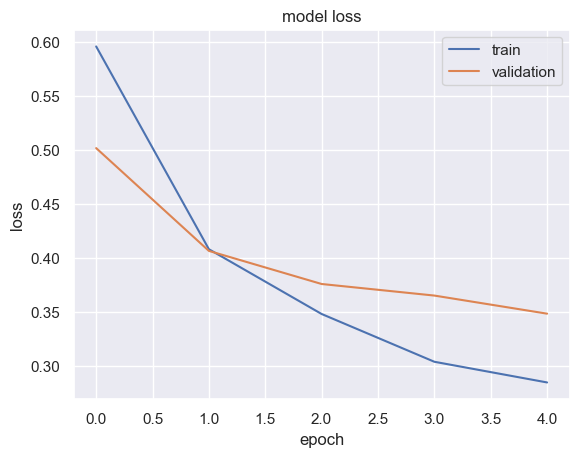

In [74]:
plt.subplots() 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

<p> Test accuracy is 81% which is okay for our first model. But our model seems to be overfitting after a certain number of epochs </p>

In [75]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('data/glove.6B.50d.txt', encoding="utf8")

In [76]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()
vocab_size = len(tokenizer.word_index)+1

#creating a embedding matrix for initial weights based on the precreated glove embedding
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

<h2>Model Architecture and Commpile</h2>

In [77]:
model3 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model3.add(embedding_layer)
model3.add(LSTM(64,return_sequences=True))
model3.add(LSTM(64,return_sequences=True))
model3.add(Dense(1, activation='sigmoid'))

In [78]:
model3.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           1396100   
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           29440     
                                                                 
 lstm_3 (LSTM)               (None, 150, 64)           33024     
                                                                 
 dense_5 (Dense)             (None, 150, 1)            65        
                                                                 
Total params: 1,458,629
Trainable params: 62,529
Non-trainable params: 1,396,100
_________________________________________________________________
None


<h2>Model Training</h2>

In [79]:
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
692/692 [==============================] - 95s 133ms/step - loss: 0.5758 - accuracy: 0.6986 - val_loss: 0.5198 - val_accuracy: 0.7372
Epoch 2/10
692/692 [==============================] - 97s 140ms/step - loss: 0.5008 - accuracy: 0.7557 - val_loss: 0.4993 - val_accuracy: 0.7555
Epoch 3/10
692/692 [==============================] - 99s 142ms/step - loss: 0.5374 - accuracy: 0.7184 - val_loss: 0.6001 - val_accuracy: 0.6949
Epoch 4/10
692/692 [==============================] - 98s 142ms/step - loss: 0.5034 - accuracy: 0.7558 - val_loss: 0.5112 - val_accuracy: 0.7514
Epoch 5/10
692/692 [==============================] - 98s 142ms/step - loss: 0.4459 - accuracy: 0.7902 - val_loss: 0.4476 - val_accuracy: 0.7872
Epoch 6/10
692/692 [==============================] - 99s 143ms/step - loss: 0.4210 - accuracy: 0.8057 - val_loss: 0.4367 - val_accuracy: 0.7948
Epoch 7/10
692/692 [==============================] - 99s 143ms/step - loss: 0.4001 - accuracy: 0.8163 - val_loss: 0.4308 - val_ac

<h3>Predict on test set<h3>

In [80]:
from sklearn.metrics import roc_auc_score, accuracy_score
output_test = model3.predict(X_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

346/346 [==============================] - 12s 34ms/step
test auc: 0.7769610743408303


<h2>Check Loss and accuracy of Train and validation sets</h2>

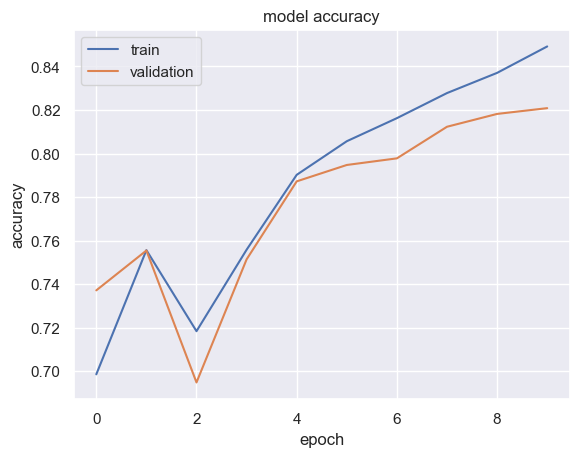

In [81]:
plt.subplots()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

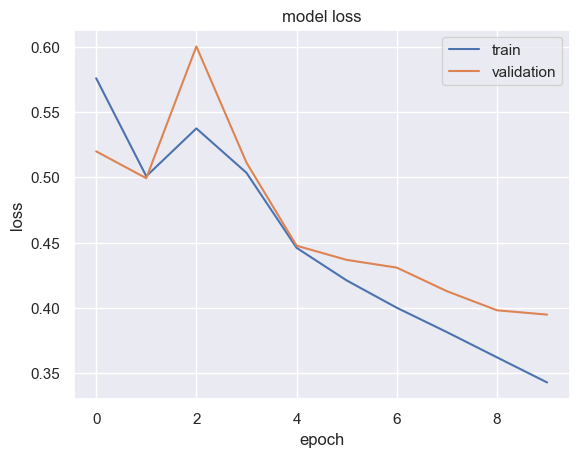

In [82]:
plt.subplots() 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

<h1>#Using Dropout layer to reduce overfitting (with GloVe Embedding)</h2>

In [84]:
#Using Dropout layer to reduce overfitting (with GloVe Embedding)
model4 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model4.add(embedding_layer)
model4.add(Dropout(0.3))
model4.add(LSTM(64,return_sequences=True))
model4.add(LSTM(64,return_sequences=True))
model4.add(Dense(1, activation='sigmoid'))


In [85]:
#Model Compile
model4.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
print(model4.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 50)           1396100   
                                                                 
 dropout_3 (Dropout)         (None, 150, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 150, 64)           29440     
                                                                 
 lstm_7 (LSTM)               (None, 150, 64)           33024     
                                                                 
 dense_7 (Dense)             (None, 150, 1)            65        
                                                                 
Total params: 1,458,629
Trainable params: 62,529
Non-trainable params: 1,396,100
_________________________________________________________________
None


In [86]:
#Moddel Traing
history4 = model4.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/5
346/346 [==============================] - 128s 362ms/step - loss: 0.6143 - accuracy: 0.6598 - val_loss: 0.5688 - val_accuracy: 0.7117
Epoch 2/5
346/346 [==============================] - 119s 343ms/step - loss: 0.5562 - accuracy: 0.7140 - val_loss: 0.5167 - val_accuracy: 0.7453
Epoch 3/5
346/346 [==============================] - 121s 351ms/step - loss: 0.5310 - accuracy: 0.7313 - val_loss: 0.4885 - val_accuracy: 0.7581
Epoch 4/5
346/346 [==============================] - 124s 358ms/step - loss: 0.5170 - accuracy: 0.7421 - val_loss: 0.4872 - val_accuracy: 0.7636
Epoch 5/5
346/346 [==============================] - 123s 356ms/step - loss: 0.5081 - accuracy: 0.7461 - val_loss: 0.4856 - val_accuracy: 0.7634


In [87]:
#Predicting on Test set
from sklearn.metrics import roc_auc_score, accuracy_score
output_test = model4.predict(X_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

346/346 [==============================] - 12s 34ms/step
test auc: 0.7508815006481911


<h2>Check Loss and accuracy of Train and validation set</h2>

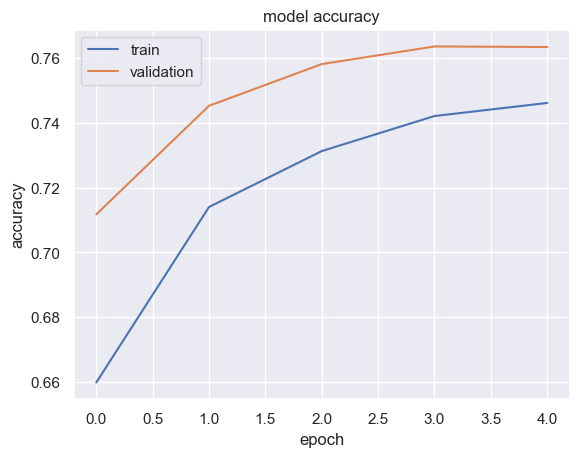

In [88]:
plt.subplots()
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

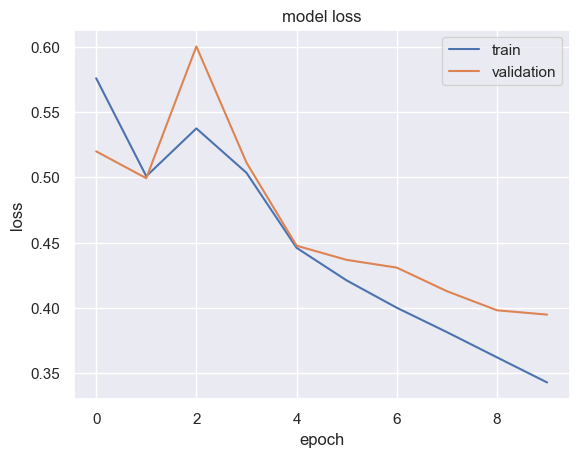

In [89]:
plt.subplots() 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

<h2>Model5: Using Adam optimizer, Dropout layer and GRU with GloVe Embedding</h2>

In [90]:
#Model Architecture

model5 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model5.add(embedding_layer)
model5.add(GRU(128,return_sequences=True))
model5.add(Dropout(0.3))
model5.add(Dense(1, activation='sigmoid'))

In [91]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model5.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 50)           1396100   
                                                                 
 gru (GRU)                   (None, 150, 128)          69120     
                                                                 
 dropout_4 (Dropout)         (None, 150, 128)          0         
                                                                 
 dense_8 (Dense)             (None, 150, 1)            129       
                                                                 
Total params: 1,465,349
Trainable params: 69,249
Non-trainable params: 1,396,100
_________________________________________________________________
None


In [92]:
history5 = model5.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/5
692/692 [==============================] - 144s 205ms/step - loss: 0.6109 - accuracy: 0.6597 - val_loss: 0.5371 - val_accuracy: 0.7330
Epoch 2/5
692/692 [==============================] - 140s 202ms/step - loss: 0.5070 - accuracy: 0.7503 - val_loss: 0.4811 - val_accuracy: 0.7658
Epoch 3/5
692/692 [==============================] - 142s 205ms/step - loss: 0.4564 - accuracy: 0.7778 - val_loss: 0.4660 - val_accuracy: 0.7744
Epoch 4/5
692/692 [==============================] - 142s 205ms/step - loss: 0.4190 - accuracy: 0.7999 - val_loss: 0.4294 - val_accuracy: 0.7926
Epoch 5/5
692/692 [==============================] - 143s 207ms/step - loss: 0.3896 - accuracy: 0.8161 - val_loss: 0.4272 - val_accuracy: 0.7986


In [93]:
from sklearn.metrics import roc_auc_score, accuracy_score
output_test = model5.predict(X_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

346/346 [==============================] - 8s 22ms/step
test auc: 0.7523192887514496


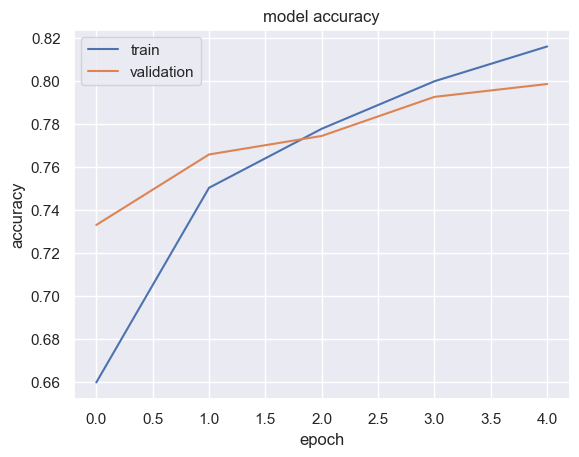

In [94]:
plt.subplots()
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

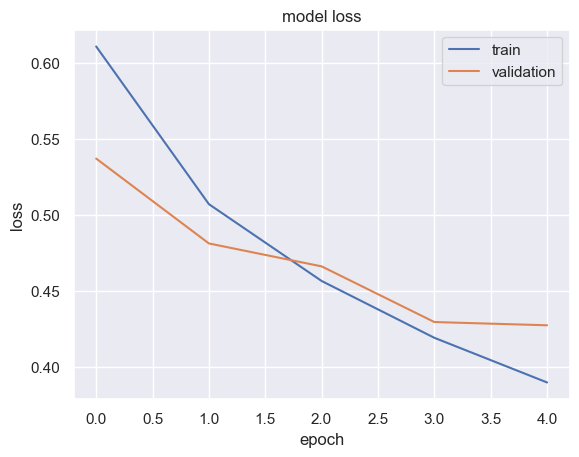

In [95]:
plt.subplots() 
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

**Model6: Using Adam optimizer, GRU with Word2Vec Embedding**

In [109]:
import gensim
words = []
for i in df2.headline.values:
    words.append(i.split())
words[:5]

w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=150 , window = 5 , min_count = 1)

tokenizer = text.Tokenizer(num_words=30000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x =tf.keras.utils.pad_sequences(tokenized_train, maxlen = 20)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size, x)

38235 [[    0     0     0 ...     2   671  1060]
 [    0     0     0 ... 11601  2121  1939]
 [    0     0     0 ... 16948   590  1478]
 ...
 [    0     0     0 ...     6   785  1781]
 [    0     0     0 ...    17   939  6104]
 [    0     0     0 ...     6   261   167]]


In [108]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 150))
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [106]:
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)
print(embedding_vectors)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.14020118 -1.27521968 -0.47105476 ... -1.01549232  1.50052118
  -1.25338554]
 [-0.15464488 -1.04220927 -0.59324884 ... -0.86865437  1.10693431
  -1.2643894 ]
 ...
 [ 0.00703196 -0.00773574 -0.01008069 ... -0.00539962  0.01749618
  -0.01635204]
 [-0.00711334 -0.0091421  -0.00458926 ... -0.01041297  0.00911458
  -0.01802557]
 [ 0.00591101 -0.00660175 -0.002919   ... -0.01240951  0.01573496
  -0.00648801]]


**Model architecture**

In [110]:
model6 = Sequential()
embedding_layer = Embedding(vocab_size, 150, weights=[embedding_vectors], input_length=maxlen , trainable=True)
model6.add(embedding_layer)
model6.add(GRU(128,return_sequences=True))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid'))

In [111]:
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model6.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 150)          5735250   
                                                                 
 gru_1 (GRU)                 (None, 150, 128)          107520    
                                                                 
 dropout_5 (Dropout)         (None, 150, 128)          0         
                                                                 
 dense_9 (Dense)             (None, 150, 1)            129       
                                                                 
Total params: 5,842,899
Trainable params: 5,842,899
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
history6 = model6.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/5
346/346 [==============================] - 118s 335ms/step - loss: 0.6595 - accuracy: 0.5870 - val_loss: 0.4424 - val_accuracy: 0.8039
Epoch 2/5
346/346 [==============================] - 120s 348ms/step - loss: 0.3648 - accuracy: 0.8391 - val_loss: 0.3544 - val_accuracy: 0.8418
Epoch 3/5
346/346 [==============================] - 122s 354ms/step - loss: 0.2771 - accuracy: 0.8830 - val_loss: 0.3323 - val_accuracy: 0.8590
Epoch 4/5
346/346 [==============================] - 123s 355ms/step - loss: 0.2221 - accuracy: 0.9105 - val_loss: 0.3101 - val_accuracy: 0.8771
Epoch 5/5
346/346 [==============================] - 123s 356ms/step - loss: 0.1793 - accuracy: 0.9302 - val_loss: 0.3060 - val_accuracy: 0.8898


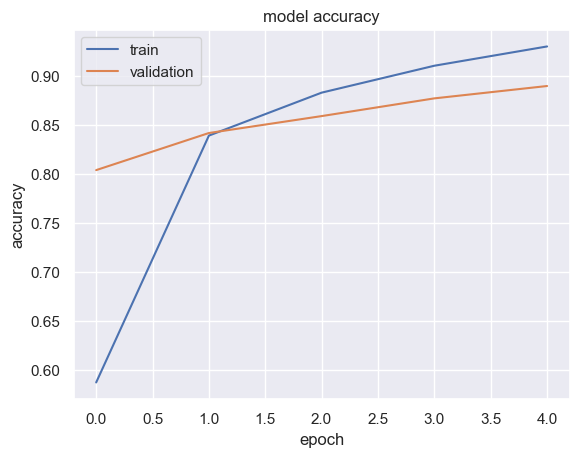

In [113]:
plt.subplots()
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

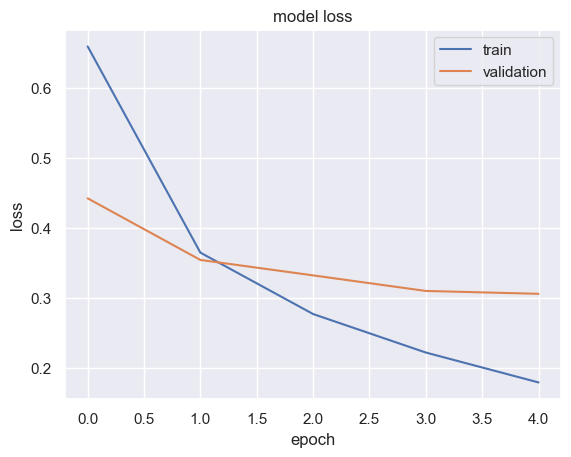

In [115]:
plt.subplots() 
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()